---
format:
  html:
    self-contained: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here
#pip install palmerpenguins
import pandas as pd
import numpy as np
import plotnine as p9

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
penguins = load_penguins()

penguins = pd.get_dummies(penguins)
penguins = penguins.dropna()
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [23]:
# Code Here
# Model 1 - Bill Length Only

y = penguins['bill_depth_mm']
x = penguins[['bill_length_mm']]

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
lr_fit = lr.fit(X_train, y_train)
y_pred_lr = lr_fit.predict(X_test)

r_squared = r2_score(y_test, y_pred_lr)
print(r_squared)

n = len(y_test)
k = 1

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(adjusted_r_squared)

models = pd.DataFrame(columns = ['num_vars','adj_R2'])
models.loc[len(models.index)] = [1, adjusted_r_squared]

0.047536296685833035
0.041900416784565686


In [ ]:
# Model 2 - Bill Length + Species
x = penguins[['bill_length_mm', 'species_Adelie', 'species_Chinstrap']]

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
lr_fit = lr.fit(X_train, y_train)
y_pred_lr = lr_fit.predict(X_test)

r_squared = r2_score(y_test, y_pred_lr)
print(r_squared)

n = len(y_test)
k = 3

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(adjusted_r_squared)

models.loc[len(models.index)] = [2, adjusted_r_squared]

0.8053942702603312
0.8018983589476425


In [ ]:
# Model 3 - Bill Length + Species + Sex
x = penguins[['bill_length_mm', 'species_Adelie', 'species_Chinstrap', 'sex_female']]

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
lr_fit = lr.fit(X_train, y_train)
y_pred_lr = lr_fit.predict(X_test)

r_squared = r2_score(y_test, y_pred_lr)
print(r_squared)

n = len(y_test)
k = 4

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(adjusted_r_squared)

models.loc[len(models.index)] = [4, adjusted_r_squared]

0.8223817025571335
0.8181017435826066


In [ ]:
# Model 4 - Everything
x = penguins[['bill_length_mm', 'species_Adelie', 'species_Chinstrap', 'sex_female', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream']]

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
lr_fit = lr.fit(X_train, y_train)
y_pred_lr = lr_fit.predict(X_test)

r_squared = r2_score(y_test, y_pred_lr)
print(r_squared)

n = len(y_test)
k = 8

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(adjusted_r_squared)

models.loc[len(models.index)] = [8, adjusted_r_squared]

0.8416358821145101
0.83381543184856


In [ ]:
models

,num_vars,adj_R2
0,1.0,0.041900
1,2.0,0.801898
2,4.0,0.818102
3,8.0,0.833815


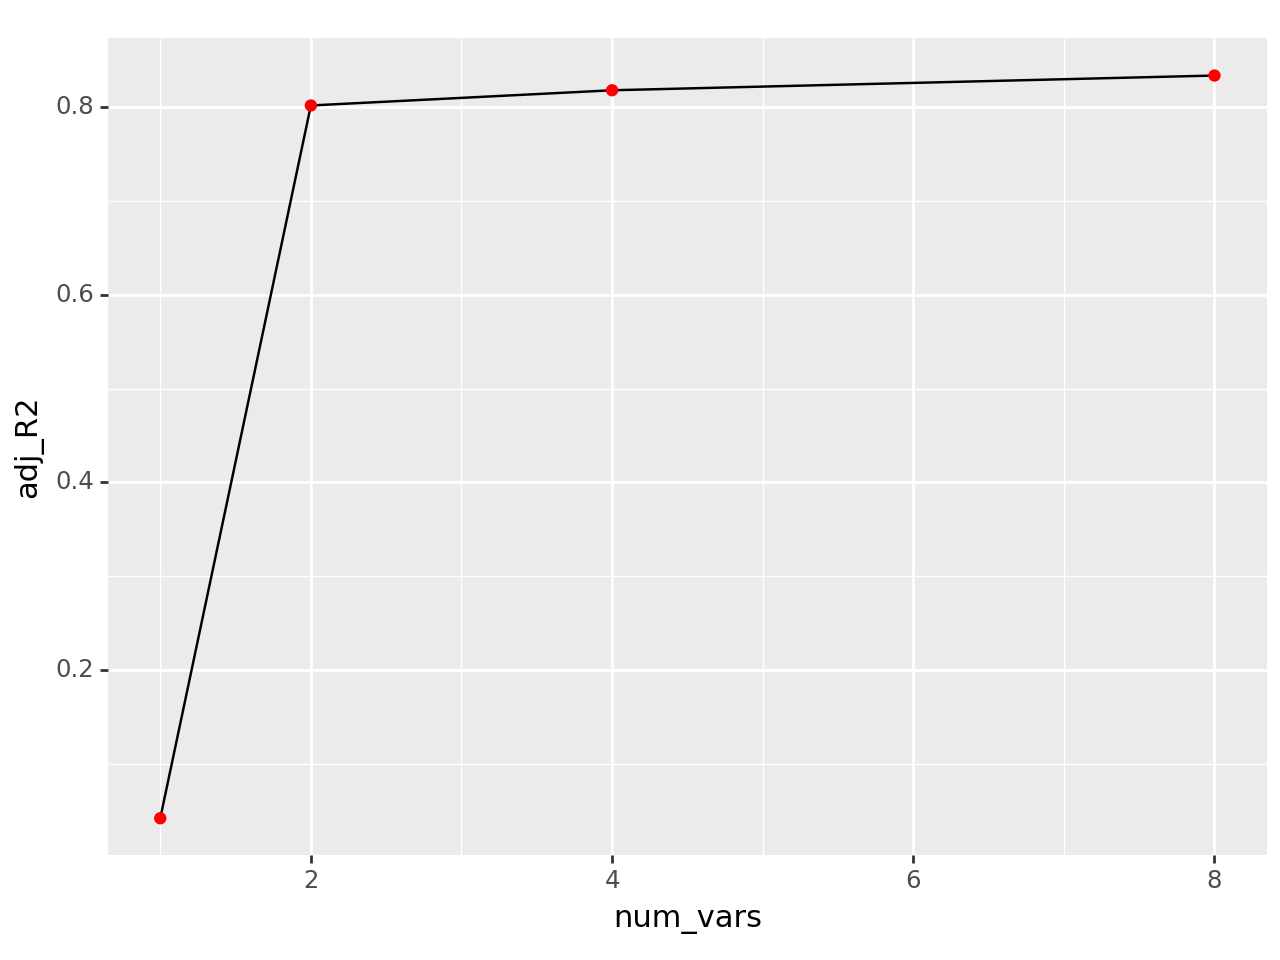

<Figure Size: (640 x 480)>

In [19]:
(p9.ggplot(models, p9.aes(x = 'num_vars', y = 'adj_R2')) + p9.geom_line() + p9.geom_point(color = 'red'))

Since these models have a different number of predictor variables, we have to use adjusted R^2 instead of R^2. Based on this graph, the first model using only bill length is quite bad, and the rest of the models are much better. Since adjusted R^2 goes up from models 2 and 3 to model 4, it suggests that at least some of the four additional variables added were worthwile